# Problem statement

##### Perform sentimental analysis on the Elon-musk tweets

# Importing the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import pandas

# Loading the dataset

In [2]:
tweet=pd.read_csv("Elon_musk.csv")

In [3]:
tweet.head()

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
tweet.drop("Unnamed: 0",axis=1,inplace=True)
tweet.head()

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


##### We have dropped the unnamed column which as index values for the tweets

# Cleaning the text using regular expressions

In [5]:
import re

def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text)# Remove The Hyper Links
    return text

tweet["Text"] = tweet["Text"].apply(cleantext)
tweet

,Text
0,I�m an alien
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
...,...
1994,"True, it sounds so surreal, but the negative ..."
1995,Make sure to read ur terms &amp; conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...


# Using TextBlob to genereate subjectivity and polarity

In [6]:
from textblob import TextBlob

def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
# Adding Subjectivity & Polarity
tweet[["subjectivity", "polarity"]] = tweet.apply(sentiment_analysis, axis=1)
tweet

,Text,subjectivity,polarity
0,I�m an alien,0.750000,-0.250000
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,Great interview!,0.750000,1.000000
3,Doge is underestimated,0.000000,0.000000
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,Samwise Gamgee,0.000000,0.000000
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


##### Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

# Plotting wordcloud 

##### Wordcloud is very effective technique to understand the most relevant and frequent words. We can check which words are most frequently occuring words in Elon musk tweets 

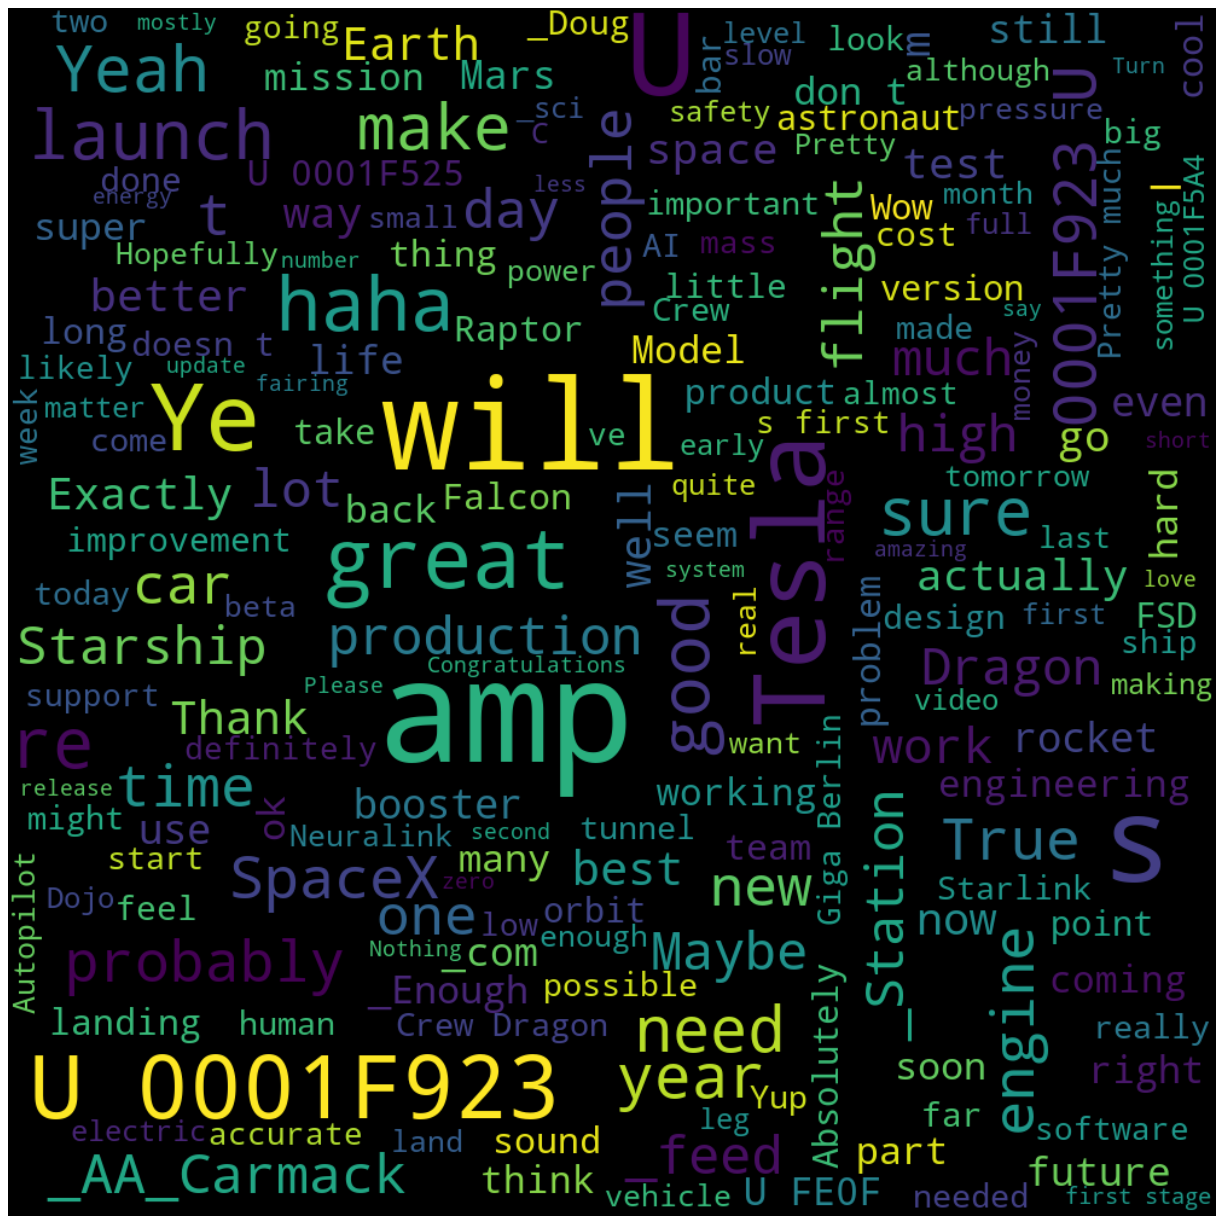

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in tweet["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


##### From the above wordcloud, we can see that SpaceX, Starship, Tesla , launch, landing,Starlink, Earts, Mars, etc are the most frequent words by Elon Musk. Most of the words used are related to his company Tesla and space and satellitles launching 

# Compute The Negative, Neutral, Positive Analysis (Sentimental analysis)

In [8]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
tweet["analysis"] = tweet["polarity"].apply(analysis)
# Print The Data
tweet

,Text,subjectivity,polarity,analysis
0,I�m an alien,0.750000,-0.250000,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,Great interview!,0.750000,1.000000,Positive
3,Doge is underestimated,0.000000,0.000000,Neutral
4,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...
1994,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,Samwise Gamgee,0.000000,0.000000,Neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [9]:
tweet["analysis"].value_counts()

Neutral     899
Positive    885
Negative    215
Name: analysis, dtype: int64

##### We could see that the most of the tweets are neutral and positive. The counts are 899 and 885 respectively  for neutral and positive tweets

# Scatter plot for  polarity of tweets

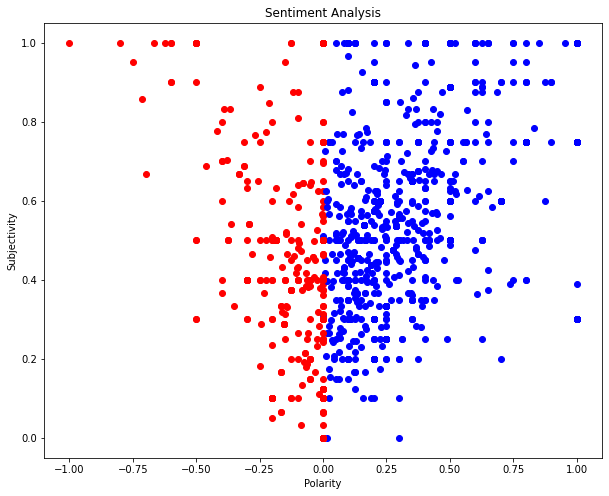

In [10]:
plt.figure(figsize=(10, 8))
for i in range(0, tweet.shape[0]):
    if(tweet["polarity"][i]>0):
        plt.scatter(tweet["polarity"][i], tweet["subjectivity"][i], color = "Blue")
    else:
        plt.scatter(tweet["polarity"][i], tweet["subjectivity"][i], color = "Red")
plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph


##### The tweets which are having polarity score more than 0 (positive words) are in blue colour and the below 0 are in red colour. We could see there are more positive tweets 